In [9]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    df = df_daily.reset_index()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    
    df_daily = df_daily.interpolate(method='polynomial', order = 2)
    
    df['ID'] = ID
    df = df[['ds','y','H','ID']]
    
    return df

In [3]:
# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df1_test = make_df('H-S_seq_1.csv',ID = 'data1', slicing = 5)
df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df3,df4,df5,df6,df7,df8))

sliced into 5 out of 62 data.
sliced into 5 out of 62 data.


In [11]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 20)
df1

,ds,y,H,ID
0,2021-08-06,0.000000,0.000,data1
1,2021-08-07,0.638215,0.000,data1
2,2021-08-08,1.249699,0.000,data1
3,2021-08-09,1.834452,0.000,data1
4,2021-08-10,2.392473,0.000,data1
...,...,...,...,...
293,2022-05-26,54.932000,4.464,data1
294,2022-05-27,54.932000,4.464,data1
295,2022-05-28,54.932000,4.464,data1
296,2022-05-29,54.932000,4.464,data1


In [36]:
m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4, # 최근 값 가중치
                  n_forecasts=10,           
                  n_changepoints = 20,      # changepoints 개수
                  changepoints_range = 1)   # changepoints 범위(0.8)

m = m.add_future_regressor(name='H', normalize=False)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000000,data4,0.308665,0.308665,0.308665,0.000000,0.000000
1,2021-08-07,0.197398,data4,0.444939,0.642337,0.642337,0.000000,0.000000
2,2021-08-08,0.390746,data4,0.585263,0.976009,0.976009,0.000000,0.000000
3,2021-08-09,0.580044,data4,0.729636,1.309680,1.309680,0.000000,0.000000
4,2021-08-10,0.765292,data4,0.878060,1.643352,1.643352,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,57.412000,data4,-0.077348,57.334652,56.225075,1.109576,1.109576
294,2022-05-27,57.412000,data4,-0.081003,57.330997,56.221420,1.109576,1.109576
295,2022-05-28,57.412000,data4,-0.084657,57.327343,56.217766,1.109576,1.109576
296,2022-05-29,57.412000,data4,-0.088311,57.323689,56.214111,1.109576,1.109576


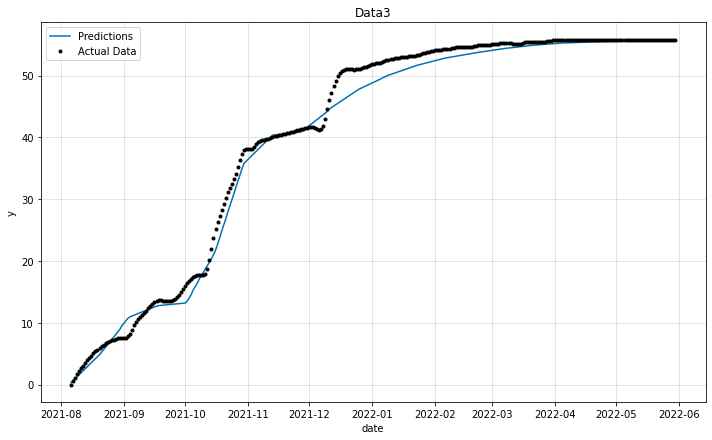

In [37]:
forecast3 = m.predict(df3)
forecast4 = m.predict(df4)
m.plot(forecast3, xlabel='date', plotting_backend='matplotlib')
# m.plot(forecast4, xlabel='4')
plt.title('Data3')
plt.legend(['Predictions','Actual Data'])

forecast4

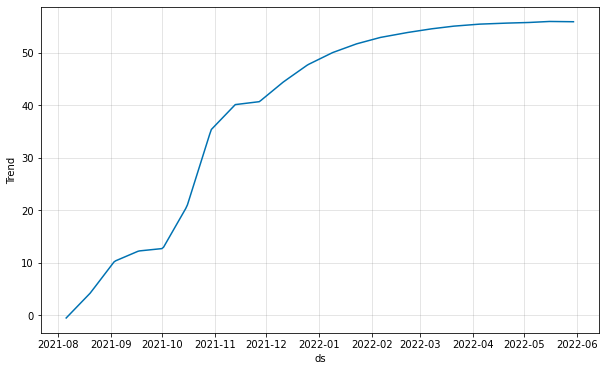

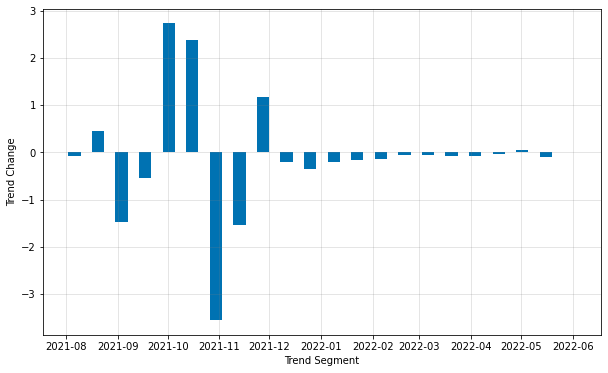

In [38]:
from neuralprophet import plot_model_parameters

plot_model_parameters.plot_trend(m)
plot_model_parameters.plot_trend_change(m)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000000,data1,-0.526744,-0.526744,-0.526744,0.000000,0.000000
1,2021-08-07,0.638215,data1,-0.828370,-0.190155,-0.190155,0.000000,0.000000
2,2021-08-08,1.249699,data1,-1.103266,0.146433,0.146433,0.000000,0.000000
3,2021-08-09,1.834452,data1,-1.351430,0.483021,0.483021,0.000000,0.000000
4,2021-08-10,2.392473,data1,-1.572863,0.819610,0.819610,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,54.932000,data1,2.205630,57.137630,55.878445,1.259185,1.259185
294,2022-05-27,54.932000,data1,2.201945,57.133945,55.874760,1.259185,1.259185
295,2022-05-28,54.932000,data1,2.198257,57.130257,55.871071,1.259185,1.259185
296,2022-05-29,54.932000,data1,2.194572,57.126572,55.867386,1.259185,1.259185


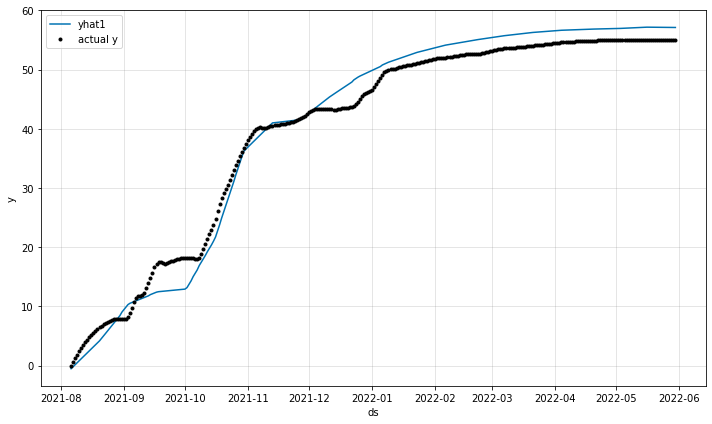

In [39]:
forecast1 = m.predict(df1)
m.plot(forecast1)

forecast1